# Importing Libraries

In [490]:
import pandas as pd
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
pd.options.mode.chained_assignment = None
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn.metrics import roc_curve
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from scipy import stats
import researchpy as rp
from sklearn.model_selection import cross_val_score
from sklearn.utils import resample
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import xgboost as xgb
from sklearn.model_selection import KFold

# Reading Dataframe

In [491]:
Data = pd.read_csv('Desktop/Kindergarden_Immunization_data.csv')

In [492]:
Data.head(5)

,School_Name,School_year,Reported,K_12_enrollment,Percent_complete_for_all_immunizations,Percent_with_any_exemption,Percent_with_medical_exemption,Percent_with_personal_exemption,Percent_with_religious_exemption,Percent_with_religious_membership_exemption,Percent_exempt_for_diphtheria_tetanus,Percent_exempt_for_pertussis,Percent_exempt_for_measles_mumps_rubella,Percent_exempt_for_polio,Percent_exempt_for_HepatitisB,Percent_exempt_for_varicella,Number_complete_for_all_immunizations,Number_with_any_exemption,Number_with_medical_exemption,Number_with_personal_exemption,Number_with_religious_exemption,Number_with_religious_membership_exemption,Number_exempt_for_diphtheria_tetanus,Number_exempt_for_pertussis,Number_exempt_for_measles_mumps_rubella,Number_exempt_for_polio,Number_exempt_for_HepatitisB,Number_exempt_for_varicella,School_District,County,ESD,Grade_Levels,Has_kindergarten,Has_6thGrade,Location 1
0,POMEROY JR SR HIGH SCHOOL,2016-17,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,POMEROY SCHOOL DISTRICT,GARFIELD,EDUCATIONAL SERVICE DISTRICT 123,7-12,N,N,"1090 PATAHA ST\nPOMEROY\n(46.472166, -117.596196)"
1,GRANGER MIDDLE SCHOOL,2016-17,Y,480.0,99.2,0.2,0.0,0.0,0.2,0.0,0.0,0.0,0.0,0.0,0.0,0.2,476.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,GRANGER SCHOOL DISTRICT,YAKIMA,EDUCATIONAL SERVICE DISTRICT 105,5-8,N,Y,"701 E AVENUE\nGRANGER\n(46.347133, -120.18824)"
2,GARDENVIEW MONTESSORI,2016-17,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,BELLINGHAM SCHOOL DISTRICT,WHATCOM,NORTHWEST EDUCATIONAL SERVICE DISTRICT 189,P-1,Y,N,"3242 FIRWOOD AVE\nBELLINGHAM\n(48.775804, -122..."
3,PUGET SOUND CHRISTIAN SCHOOL,2016-17,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,TACOMA SCHOOL DISTRICT,PIERCE,PUGET SOUND EDUCATIONAL SERVICE DISTRICT 121,P-6,Y,Y,"1740 S 84TH ST\nTACOMA\n(47.181055, -122.459845)"
4,SEABURY SCHOOL,2016-17,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,TACOMA SCHOOL DISTRICT,PIERCE,PUGET SOUND EDUCATIONAL SERVICE DISTRICT 121,K+,Y,N,"1801 NE 53RD ST\nTACOMA\n(47.304686, -122.423352)"


# Data Pre Processing

In [493]:
Data = Data.drop('School_year',axis = 1)

In [494]:
Data.Grade_Levels = Data.Grade_Levels.str.replace(' ', '')
Data.Grade_Levels = Data.Grade_Levels.str.replace('8-APR', '8-4')

In [495]:
Data['Location 1'] = Data['Location 1'].astype(object)
Data['Location 1'] = Data['Location 1'].replace(np.nan,"PO BOX 476\nYELM")
Data['Location 1'] = [x.split('\n')[0] for x in Data['Location 1']]
Data['Location 1'] = Data['Location 1'].str.replace('[^\w\s]','')

In [496]:
Data.loc[:,'Percent_complete_for_all_immunizations':'Percent_exempt_for_varicella'] = Data.loc[:,'Percent_complete_for_all_immunizations':'Percent_exempt_for_varicella']/100

## Checking Missing Values

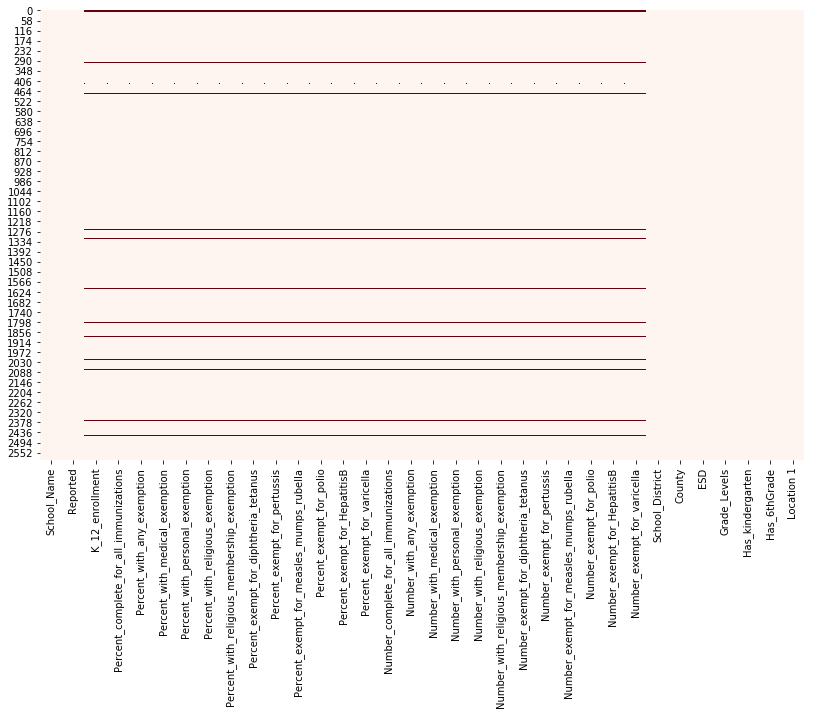

In [497]:
plt.gcf().set_size_inches(13.7,8.27)
sns.heatmap(Data.isnull(),cbar=False,cmap='Reds')

In [498]:
Data['K_12_enrollment'].fillna(Data['K_12_enrollment'].mode()[0], inplace=True)
Data['Percent_complete_for_all_immunizations'] = Data['Percent_complete_for_all_immunizations'].fillna(Data['Percent_complete_for_all_immunizations'].mean())
Data['Percent_with_any_exemption'] = Data['Percent_with_any_exemption'].fillna(Data['Percent_with_any_exemption'].mean())
Data['Percent_with_medical_exemption'] = Data['Percent_with_medical_exemption'].fillna(Data['Percent_with_medical_exemption'].mean())
Data['Percent_with_personal_exemption'] = Data['Percent_with_personal_exemption'].fillna(Data['Percent_with_personal_exemption'].mean())
Data['Percent_with_religious_exemption'] = Data['Percent_with_religious_exemption'].fillna(Data['Percent_with_religious_exemption'].mean())
Data['Percent_with_religious_membership_exemption'] = Data['Percent_with_religious_membership_exemption'].fillna(Data['Percent_with_religious_membership_exemption'].mean())
Data['Percent_exempt_for_diphtheria_tetanus'] = Data['Percent_exempt_for_diphtheria_tetanus'].fillna(Data['Percent_exempt_for_diphtheria_tetanus'].mean())
Data['Percent_exempt_for_pertussis'] = Data['Percent_exempt_for_pertussis'].fillna(Data['Percent_exempt_for_pertussis'].mean())
Data['Percent_exempt_for_measles_mumps_rubella'] = Data['Percent_exempt_for_measles_mumps_rubella'].fillna(Data['Percent_exempt_for_measles_mumps_rubella'].mean())
Data['Percent_exempt_for_polio'] = Data['Percent_exempt_for_polio'].fillna(Data['Percent_exempt_for_polio'].mean())
Data['Percent_exempt_for_HepatitisB'] = Data['Percent_exempt_for_HepatitisB'].fillna(Data['Percent_exempt_for_HepatitisB'].mean())
Data['Percent_exempt_for_varicella'] = Data['Percent_exempt_for_varicella'].fillna(Data['Percent_exempt_for_varicella'].mean())
Data['Number_complete_for_all_immunizations'].fillna(Data['Number_complete_for_all_immunizations'].mode()[0], inplace=True)
Data['Number_with_any_exemption'].fillna(Data['Number_with_any_exemption'].mode()[0], inplace=True)
Data['Number_with_medical_exemption'].fillna(Data['Number_with_medical_exemption'].mode()[0], inplace=True)
Data['Number_with_personal_exemption'].fillna(Data['Number_with_personal_exemption'].mode()[0], inplace=True)
Data['Number_with_religious_exemption'].fillna(Data['Number_with_religious_exemption'].mode()[0], inplace=True)
Data['Number_with_religious_membership_exemption'].fillna(Data['Number_with_religious_membership_exemption'].mode()[0], inplace=True)
Data['Number_exempt_for_diphtheria_tetanus'].fillna(Data['Number_exempt_for_diphtheria_tetanus'].mode()[0], inplace=True)
Data['Number_exempt_for_pertussis'].fillna(Data['Number_exempt_for_pertussis'].mode()[0], inplace=True)
Data['Number_exempt_for_measles_mumps_rubella'].fillna(Data['Number_exempt_for_measles_mumps_rubella'].mode()[0], inplace=True)
Data['Number_exempt_for_polio'].fillna(Data['Number_exempt_for_polio'].mode()[0], inplace=True)
Data['Number_exempt_for_HepatitisB'].fillna(Data['Number_exempt_for_HepatitisB'].mode()[0], inplace=True)
Data['Number_exempt_for_varicella'].fillna(Data['Number_exempt_for_varicella'].mode()[0], inplace=True)

## Dealing with Data Types

In [499]:
#Encoding Categorical columns with 2 categories
le = LabelEncoder()
le.fit(Data.Reported)
Data.Reported = le.transform(Data.Reported)
le.fit(Data.Has_kindergarten)
Data.Has_kindergarten = le.transform(Data.Has_kindergarten)
le.fit(Data.Has_6thGrade)
Data.Has_6thGrade = le.transform(Data.Has_6thGrade)

In [500]:
#Changing Data Types
Data['K_12_enrollment'] = Data['K_12_enrollment'].astype(np.int64)
Data['Number_complete_for_all_immunizations'] = Data['Number_complete_for_all_immunizations'].astype(np.int64)
Data['Number_with_any_exemption'] = Data['Number_with_any_exemption'].astype(np.int64)
Data['Number_with_medical_exemption'] = Data['Number_with_medical_exemption'].astype(np.int64)
Data['Number_with_personal_exemption'] = Data['Number_with_personal_exemption'].astype(np.int64)
Data['Number_with_religious_exemption'] = Data['Number_with_religious_exemption'].astype(np.int64)
Data['Number_with_religious_membership_exemption'] = Data['Number_with_religious_membership_exemption'].astype(np.int64)
Data['Number_exempt_for_diphtheria_tetanus'] = Data['Number_exempt_for_diphtheria_tetanus'].astype(np.int64)
Data['Number_exempt_for_pertussis'] = Data['Number_exempt_for_pertussis'].astype(np.int64)
Data['Number_exempt_for_measles_mumps_rubella'] = Data['Number_exempt_for_measles_mumps_rubella'].astype(np.int64)
Data['Number_exempt_for_polio'] = Data['Number_exempt_for_polio'].astype(np.int64)
Data['Number_exempt_for_HepatitisB'] = Data['Number_exempt_for_HepatitisB'].astype(np.int64)
Data['Number_exempt_for_varicella'] = Data['Number_exempt_for_varicella'].astype(np.int64)
Data['Has_kindergarten'] = Data['Has_kindergarten'].astype(object)
Data['Has_6thGrade'] = Data['Has_6thGrade'].astype(object)

In [501]:
Data.dtypes

School_Name                                     object
Reported                                         int32
K_12_enrollment                                  int64
Percent_complete_for_all_immunizations         float64
Percent_with_any_exemption                     float64
Percent_with_medical_exemption                 float64
Percent_with_personal_exemption                float64
Percent_with_religious_exemption               float64
Percent_with_religious_membership_exemption    float64
Percent_exempt_for_diphtheria_tetanus          float64
Percent_exempt_for_pertussis                   float64
Percent_exempt_for_measles_mumps_rubella       float64
Percent_exempt_for_polio                       float64
Percent_exempt_for_HepatitisB                  float64
Percent_exempt_for_varicella                   float64
Number_complete_for_all_immunizations            int64
Number_with_any_exemption                        int64
Number_with_medical_exemption                    int64
Number_wit

# Exploratory Data Analysis

Preliminary Data Analysis Done in Tableau

# Feature Selection

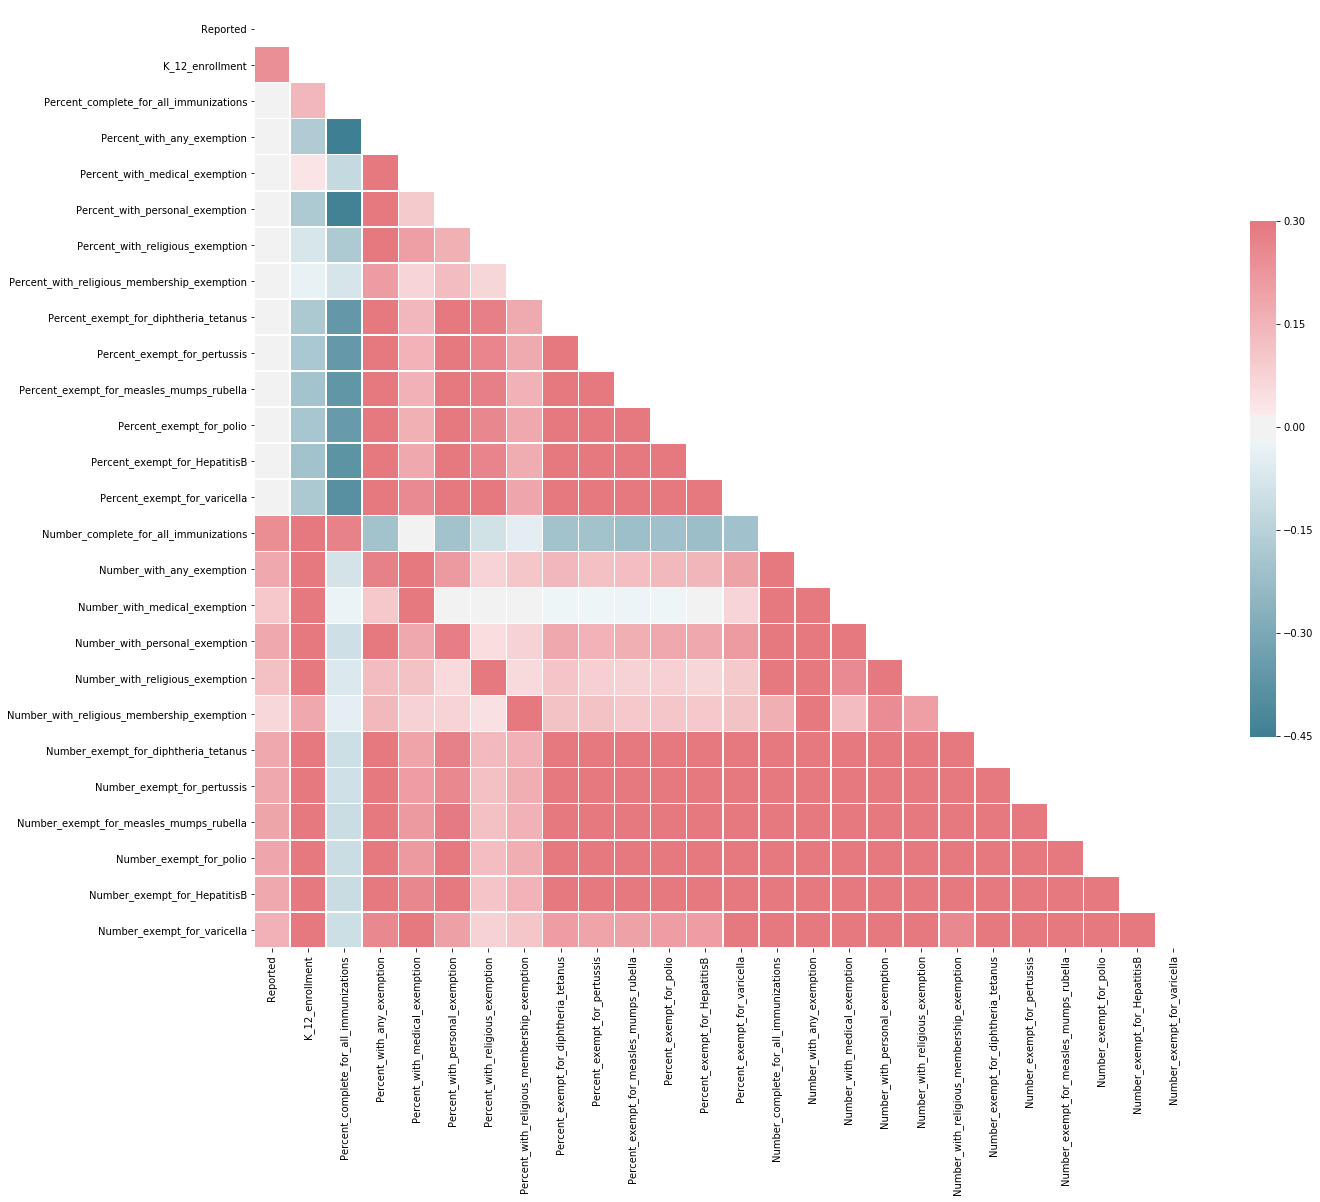

In [503]:
#Correlation amongst the attributes
corr = Data.corr()
mask = np.triu(np.ones_like(corr, dtype=np.bool))
f, ax = plt.subplots(figsize=(21, 19))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [ ]:
Percent_complete_for_all_immunizations,Percent_with_any_exemption

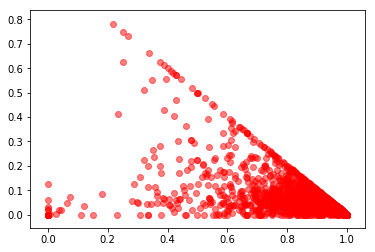

In [455]:
#Taking top 5 School Name observed from EDA
for x in Data['School_Name']:
    if x == 'ROOSEVELT ELEMENTARY SCHOOL':
        Data['School_Name'].replace({x: "ROOSEVELT ELEMENTARY SCHOOL"}, inplace = True)
    elif x == 'WASHINGTON ELEMENTARY SCHOOL':
        Data['School_Name'].replace({x: "WASHINGTON ELEMENTARY SCHOOL"}, inplace = True)
    elif x== 'JEFFERSON ELEMENTARY':
        Data['School_Name'].replace({x: "JEFFERSON ELEMENTARY"}, inplace = True)
    elif x== 'LINCOLN ELEMENTARY SCHOOL':
        Data['School_Name'].replace({x: "LINCOLN ELEMENTARY SCHOOL"}, inplace = True)
    elif x== 'CASCADE MIDDLE SCHOOL':
        Data['School_Name'].replace({x: "CASCADE MIDDLE SCHOOL"}, inplace = True)
    else:
        Data['School_Name'].replace({x: np.nan}, inplace = True)

In [456]:
#Taking top 5 School District observed from EDA
for x in Data['School_District']:
    if x == 'SEATTLE PUBLIC SCHOOLS':
        Data['School_District'].replace({x: "SEATTLE PUBLIC SCHOOLS"}, inplace = True)
    elif x == 'TACOMA SCHOOL DISTRICT':
        Data['School_District'].replace({x: "TACOMA SCHOOL DISTRICT"}, inplace = True)
    elif x== 'LAKE WASHINGTON SCHOOL DISTRICT':
        Data['School_District'].replace({x: "LAKE WASHINGTON SCHOOL DISTRICT"}, inplace = True)
    elif x== 'SPOKANE SCHOOL DISTRICT':
        Data['School_District'].replace({x: "SPOKANE SCHOOL DISTRICT"}, inplace = True)
    elif x== 'BELLEVUE SCHOOL DISTRICT':
        Data['School_District'].replace({x: "BELLEVUE SCHOOL DISTRICT"}, inplace = True)
    else:
        Data['School_District'].replace({x: np.nan}, inplace = True)

In [457]:
#Taking top 5 County observed from EDA
for x in Data['County']:
    if x == 'KING':
        Data['County'].replace({x: "KING"}, inplace = True)
    elif x == 'PIERCE':
        Data['County'].replace({x: "PIERCE"}, inplace = True)
    elif x== 'SNOHOMISH':
        Data['County'].replace({x: "SNOHOMISH"}, inplace = True)
    elif x== 'SPOKANE':
        Data['County'].replace({x: "SPOKANE"}, inplace = True)
    elif x== 'CLARK':
        Data['County'].replace({x: "CLARK"}, inplace = True)
    else:
        Data['County'].replace({x: np.nan}, inplace = True)

In [458]:
#Taking top 5 ESD observed from EDA
for x in Data['ESD']:
    if x == 'PUGET SOUND EDUCATIONAL SERVICE DISTRICT 121':
        Data['ESD'].replace({x: "PUGET SOUND EDUCATIONAL SERVICE DISTRICT 121"}, inplace = True)
    elif x == 'NORTHWEST EDUCATIONAL SERVICE DISTRICT 189':
        Data['ESD'].replace({x: "NORTHWEST EDUCATIONAL SERVICE DISTRICT 189"}, inplace = True)
    elif x== 'EDUCATIONAL SERVICE DISTRICT 101':
        Data['ESD'].replace({x: "EDUCATIONAL SERVICE DISTRICT 101"}, inplace = True)
    elif x== 'EDUCATIONAL SERVICE DISTRICT 112':
        Data['ESD'].replace({x: "EDUCATIONAL SERVICE DISTRICT 112"}, inplace = True)
    elif x== 'EDUCATIONAL SERVICE DISTRICT 113':
        Data['ESD'].replace({x: "EDUCATIONAL SERVICE DISTRICT 113"}, inplace = True)
    else:
        Data['ESD'].replace({x: np.nan}, inplace = True)

In [459]:
#Taking top 5 Grade Levels observed from EDA
for x in Data['Grade_Levels']:
    if x == 'K-5':
        Data['Grade_Levels'].replace({x: "K-5"}, inplace = True)
    elif x == '9-12':
        Data['Grade_Levels'].replace({x: "9-12"}, inplace = True)
    elif x== 'K-6':
        Data['Grade_Levels'].replace({x: "K-6"}, inplace = True)
    elif x== '6-8':
        Data['Grade_Levels'].replace({x: "6-8"}, inplace = True)
    elif x== 'PK-5':
        Data['Grade_Levels'].replace({x: "PK-5"}, inplace = True)
    else:
        Data['Grade_Levels'].replace({x: np.nan}, inplace = True)

In [460]:
#Taking top 5 Location observed from EDA
for x in Data['Location 1']:
    if x == 'PO BOX 476':
        Data['Location 1'].replace({x: "PO BOX 476"}, inplace = True)
    elif x == 'PO BOX 128':
        Data['Location 1'].replace({x: "PO BOX 128"}, inplace = True)
    elif x== 'PO BOX 200':
        Data['Location 1'].replace({x: "PO BOX 200"}, inplace = True)
    elif x== 'PO BOX 458':
        Data['Location 1'].replace({x: "PO BOX 458"}, inplace = True)
    elif x== 'PO BOX 159':
        Data['Location 1'].replace({x: "PO BOX  159"}, inplace = True)
    else:
        Data['Location 1'].replace({x: np.nan}, inplace = True)

In [461]:
#One Hot Encoding all categorical columns with categories more than 2
Data = pd.get_dummies(Data)

In [462]:
#Checking Correlation of Features with the Target variable
correlations = Data.corr()['Reported'].sort_values()

print('Most Positive Correlations:\n', correlations.tail(10))
print('\nMost Negative Correlations:\n', correlations.head(10))

Most Positive Correlations:
 Number_exempt_for_diphtheria_tetanus       0.177333
Number_with_personal_exemption             0.177728
Number_exempt_for_pertussis                0.181214
Number_with_any_exemption                  0.182217
Number_exempt_for_HepatitisB               0.182248
Number_exempt_for_polio                    0.184395
Number_exempt_for_measles_mumps_rubella    0.187852
K_12_enrollment                            0.240539
Number_complete_for_all_immunizations      0.242139
Reported                                   1.000000
Name: Reported, dtype: float64

Most Negative Correlations:
 Has_6thGrade_1                                     -5.266516e-02
School_District_BELLEVUE SCHOOL DISTRICT           -3.729402e-02
School_District_SEATTLE PUBLIC SCHOOLS             -3.486562e-02
County_KING                                        -2.496103e-02
Has_kindergarten_1                                 -1.687878e-02
ESD_EDUCATIONAL SERVICE DISTRICT 112               -1.354567e-02


In [471]:
Data.Reported = Data.Reported.astype('category')

# Modeling

In [472]:
Data_majority = Data[Data.Reported==1]
Data_minority = Data[Data.Reported==0]
Data_minority_upsampled = resample(Data_minority,replace=True,n_samples=2478,random_state=123)
Data_upsampled = pd.concat([Data_majority, Data_minority_upsampled])

In [473]:
X = Data_upsampled.loc[:, Data.columns != 'Reported']
y = Data_upsampled['Reported']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [474]:
scaler = StandardScaler()
# Fit on training set only.
scaler.fit(X_train)
# Apply transform to both the training set and the test set.
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [475]:
pca = PCA(.95)

In [476]:
pca.fit(X_train)

PCA(copy=True, iterated_power='auto', n_components=0.95, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [477]:
X_train = pca.transform(X_train)
X_test = pca.transform(X_test)

# Model 1 - Naivye Bayes Model

In [478]:
nb = GaussianNB()
nb.fit(X_train,y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [479]:
y_pred1 = nb.predict(X_test)
accuracy_score(y_test, y_pred1, normalize=True, sample_weight=None)

0.9616935483870968

In [480]:
print(classification_report(y_test,y_pred1))

              precision    recall  f1-score   support

           0       0.96      0.97      0.96       487
           1       0.97      0.96      0.96       505

    accuracy                           0.96       992
   macro avg       0.96      0.96      0.96       992
weighted avg       0.96      0.96      0.96       992



Text(0.5, 1.0, 'Test Set Results')

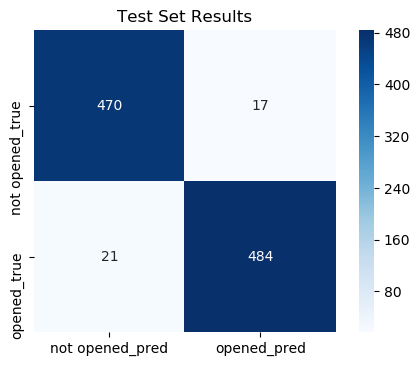

In [481]:
plt.figure(dpi=100)
#plt.subplot(1,2,1)
    
lr_confusion = confusion_matrix(y_test, y_pred1)
    
sns.heatmap(lr_confusion, cmap=plt.cm.Blues,annot=True, square=True,fmt='g',
            xticklabels=['not opened_pred','opened_pred'], 
            yticklabels=['not opened_true','opened_true'])


plt.title('Test Set Results')

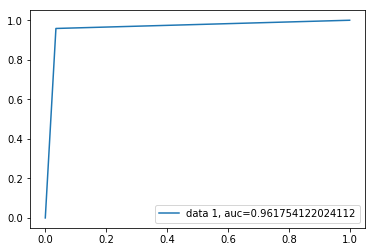

In [482]:
fpr1, tpr1, _ = metrics.roc_curve(y_test,  y_pred1)
auc = metrics.roc_auc_score(y_test, y_pred1)
plt.plot(fpr1,tpr1,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

# Model 2 - Logistic Regression

In [483]:
lr = LogisticRegression(C=10, class_weight='balanced',penalty='l1')
lr.fit(X_train,y_train)

C:\Users\shrey\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\shrey\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


LogisticRegression(C=10, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='warn', n_jobs=None, penalty='l1',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [484]:
y_pred = lr.predict(X_test)

In [485]:
accuracy_score(y_test, y_pred, normalize=True, sample_weight=None)

0.9737903225806451

In [486]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.95      1.00      0.97       487
           1       1.00      0.95      0.97       505

    accuracy                           0.97       992
   macro avg       0.97      0.97      0.97       992
weighted avg       0.98      0.97      0.97       992



Text(0.5, 1.0, 'Test Set Results')

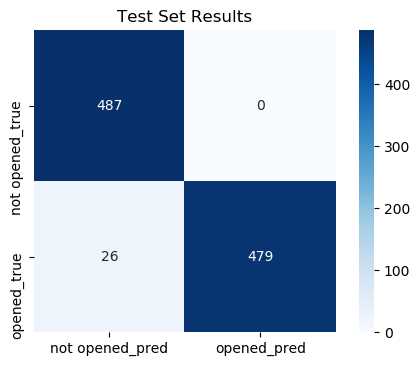

In [487]:
plt.figure(dpi=100)
#plt.subplot(1,2,1)
    
lr_confusion = confusion_matrix(y_test, y_pred)
    
sns.heatmap(lr_confusion, cmap=plt.cm.Blues,annot=True, square=True,fmt='g',
            xticklabels=['not opened_pred','opened_pred'], 
            yticklabels=['not opened_true','opened_true'])


plt.title('Test Set Results')

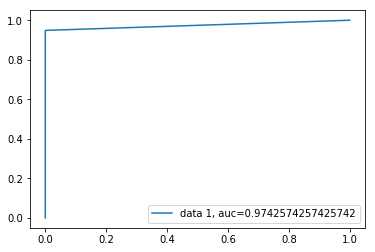

In [488]:
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred)
auc = metrics.roc_auc_score(y_test, y_pred)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

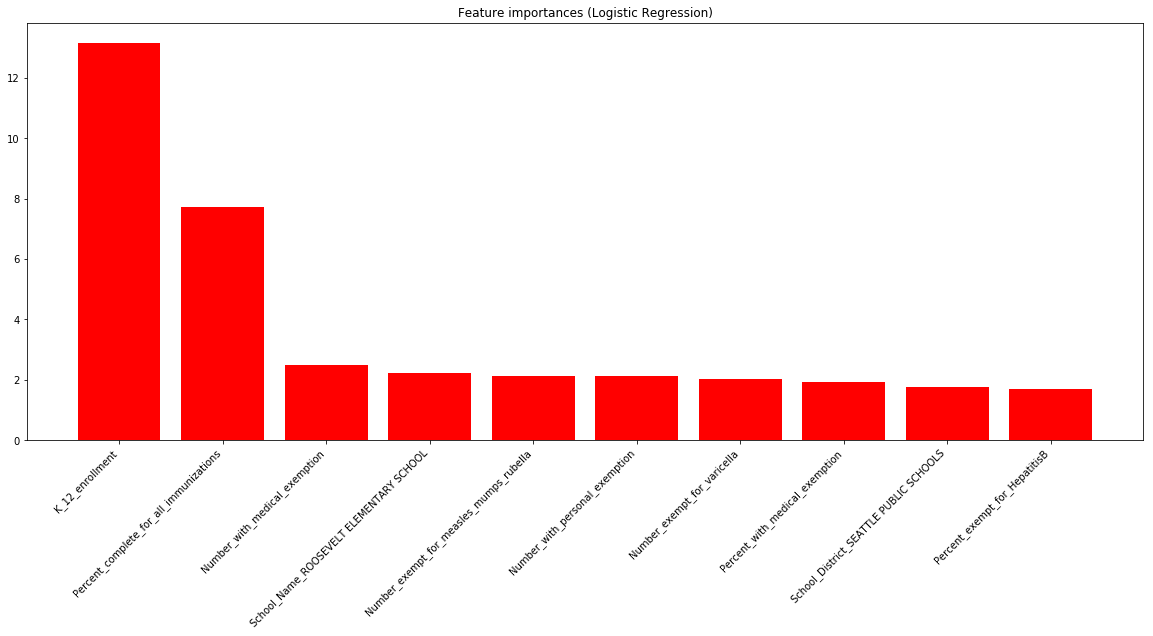

In [489]:
coefs = np.abs(lr.coef_[0])
indices = np.argsort(coefs)[::-1]

plt.figure(figsize=(20, 10))
plt.title("Feature importances (Logistic Regression)")
plt.bar(range(10), coefs[indices[:10]],
       color="r", align="center",)
plt.xticks(range(10), X.columns[indices[:10]], rotation=45, ha='right')
plt.subplots_adjust(bottom=0.3)

# Model Analysis EDA

Multivariate Analysis done in Tableau

# Inferential Statistics

In [435]:
table, results = rp.crosstab(Data['Reported'], Data['K_12_enrollment'], prop= 'col', test= 'chi-square')

In [569]:
results

,Chi-square test,results
0,Pearson Chi-square ( 64.0) =,129.9852
1,p-value =,0.0000
2,Cramer's V =,0.1596


In [437]:
table1, results1 = rp.crosstab(Data['Reported'], Data['Percent_complete_for_all_immunizations'], prop= 'col', test= 'chi-square')

In [438]:
results1

,Chi-square test,results
0,Pearson Chi-square ( 467.0) =,2595.0
1,p-value =,0.0
2,Cramer's V =,1.0


In [439]:
table2, results2 = rp.crosstab(Data['Reported'], Data['Number_with_medical_exemption'], prop= 'col', test= 'chi-square')

In [440]:
results2

,Chi-square test,results
0,Pearson Chi-square ( 64.0) =,300.8451
1,p-value =,0.0000
2,Cramer's V =,0.3405
